Titanic Project


In [1]:

import pandas as pd
import numpy as np
import random as rnd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Data Importation


In [2]:
df_train_titanic = pd.read_csv('train.csv')
df_test_titanic  = pd.read_csv('test.csv')

In [3]:
df_train_titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
df_train_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


So only 3 columns contains missing values : Age, Cabin, Embarked

the column Cabin contains too many missing values to be useful so I will drop it

In [6]:
df_train_titanic = df_train_titanic.drop(columns = {'Cabin','Ticket'})

Let's try to understand the correlation between the features and the survivabillity 


In [7]:
df_train_titanic[['Survived','Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


74% of the female survived while only 19% for men

In [8]:
df_train_titanic[['Survived','Pclass']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


There is two missing values for embarked so let's fill them with the values which is the most present in our data

In [9]:
df_train_titanic['Embarked'] = df_train_titanic['Embarked'].fillna(df_train_titanic['Embarked'].value_counts().index[0])

In [10]:
df_train_titanic[['Survived','Embarked']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [11]:
df_train_titanic[['Survived','SibSp']].groupby(['SibSp']).mean().sort_values(by='Survived',ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [12]:
df_train_titanic[['Survived','Parch']].groupby(['Parch']).mean().sort_values(by='Survived',ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


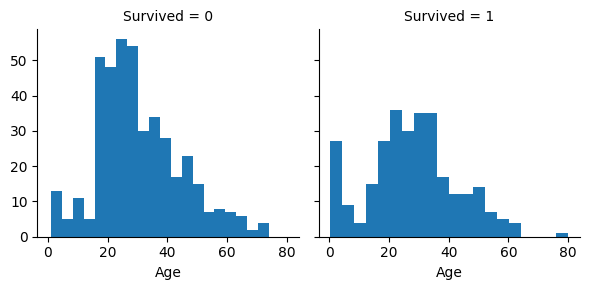

In [13]:
g = sns.FacetGrid(df_train_titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.i

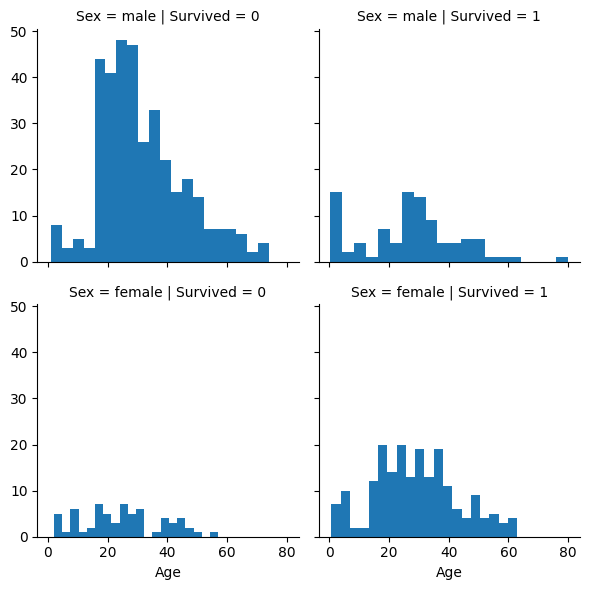

In [14]:
g = sns.FacetGrid(df_train_titanic, col='Survived',row = 'Sex')
g.map(plt.hist, 'Age', bins=20)

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.i

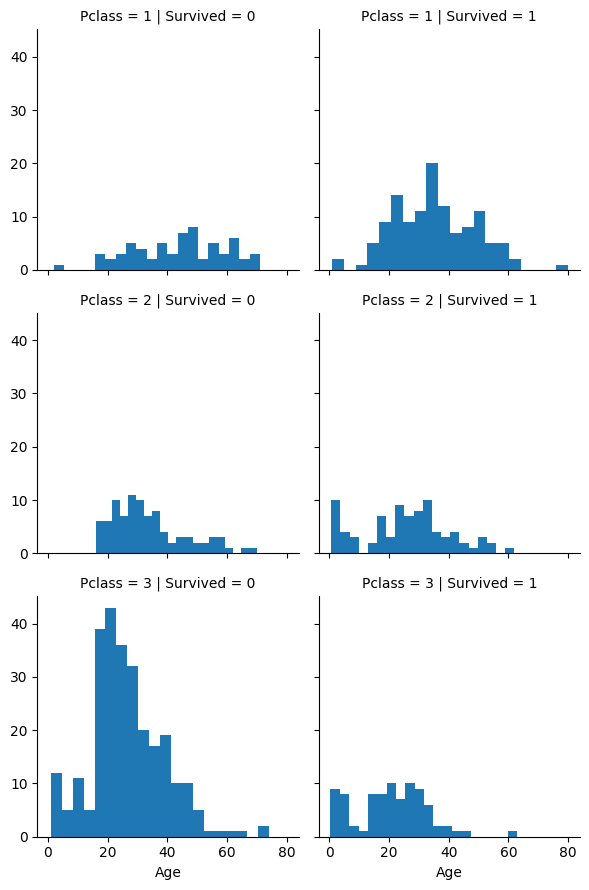

In [15]:
g = sns.FacetGrid(df_train_titanic, col='Survived',row = 'Pclass')
g.map(plt.hist, 'Age', bins=20)


Work on the title inside the Name.

idea from this notebook : https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [16]:
df_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [17]:
df_train_titanic['Name_Title'] = df_train_titanic['Name'].str.extract(r'([a-zA-Z]+\.)')

In [18]:
pd.crosstab(df_train_titanic['Name_Title'], df_train_titanic['Sex'])

Sex,female,male
Name_Title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [19]:
df_train_titanic['Name_Title'] = df_train_titanic['Name_Title'].replace(['Lady.', 'Countess.','Capt.', 'Col.',\
 	'Don.', 'Dr.', 'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'], 'Rare')

df_train_titanic['Name_Title'] = df_train_titanic['Name_Title'].replace('Mlle.', 'Miss.')
df_train_titanic['Name_Title'] = df_train_titanic['Name_Title'].replace('Ms.', 'Miss.')
df_train_titanic['Name_Title'] = df_train_titanic['Name_Title'].replace('Mme.', 'Mrs.')

In [20]:
df_train_titanic[['Survived','Name_Title']].groupby(['Name_Title']).mean().sort_values(by='Survived',ascending = False)

,Survived
Name_Title,
Mrs.,0.793651
Miss.,0.702703
Master.,0.575000
Rare,0.347826
Mr.,0.156673


In [21]:
df_train_titanic['Name_Title'] = df_train_titanic['Name_Title'].map({'Mrs.':0,'Miss.':1,'Master.':3,'Rare':4,'Mr.':5})
df_train_titanic['Sex'] = df_train_titanic['Sex'].map({'male':0,'female':1})

In [22]:
df_train_titanic = df_train_titanic.drop(columns={'Name','PassengerId'})

In [23]:
df_train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title
0,0,3,0,22.0,1,0,7.2500,S,5
1,1,1,1,38.0,1,0,71.2833,C,0
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,0
4,0,3,0,35.0,0,0,8.0500,S,5
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,4
887,1,1,1,19.0,0,0,30.0000,S,1
888,0,3,1,NaN,1,2,23.4500,S,1
889,1,1,0,26.0,0,0,30.0000,C,5


filling the missing value for Age

In [24]:
df_train_titanic['Age'] = df_train_titanic['Age'].fillna(df_train_titanic['Age'].median())

cut the dataset in 4 different range for age, to be able to map them with 1,2,3,4

In [25]:
df_train_titanic['range_Age'] = pd.cut(df_train_titanic['Age'],4)

In [26]:

df_train_titanic.loc[ df_train_titanic['Age'] <= 20, 'Age'] = 0
df_train_titanic.loc[(df_train_titanic['Age'] > 20) & (df_train_titanic['Age'] <= 40), 'Age'] = 1
df_train_titanic.loc[(df_train_titanic['Age'] > 40) & (df_train_titanic['Age'] <= 60), 'Age'] = 2
df_train_titanic.loc[(df_train_titanic['Age'] > 60) & (df_train_titanic['Age'] <= 100), 'Age'] = 3
   

In [27]:
df_train_titanic = df_train_titanic.drop(columns = {"range_Age"})

In [28]:
df_train_titanic['Embarked'] = df_train_titanic['Embarked'].map({'S':0,'Q':1,'C':2})

In [29]:
df_train_titanic['Family'] = df_train_titanic['SibSp'] + df_train_titanic['Parch']

In [30]:
df_train_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Title,Family
0,0,3,0,1.0,1,0,7.2500,0,5,1
1,1,1,1,1.0,1,0,71.2833,2,0,1
2,1,3,1,1.0,0,0,7.9250,0,1,0
3,1,1,1,1.0,1,0,53.1000,0,0,1
4,0,3,0,1.0,0,0,8.0500,0,5,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,0,4,0
887,1,1,1,0.0,0,0,30.0000,0,1,0
888,0,3,1,1.0,1,2,23.4500,0,1,3
889,1,1,0,1.0,0,0,30.0000,2,5,0


In [31]:
df_train_titanic[['Survived','Family']].groupby(['Family']).mean()

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [32]:
df_train_titanic = df_train_titanic.drop(columns = {"SibSp","Parch"})

In [33]:
df_train_titanic['range_Fair'] = pd.cut(df_train_titanic['Fare'],6)


In [34]:
df_train_titanic[['Survived','range_Fair']].groupby(['range_Fair']).mean()

,Survived
range_Fair,
"(-0.512, 85.388]",0.352727
"(85.388, 170.776]",0.804348
"(170.776, 256.165]",0.636364
"(256.165, 341.553]",0.666667
"(341.553, 426.941]",NaN
"(426.941, 512.329]",1.000000


In [35]:
df_train_titanic['Fare'] = df_train_titanic['Fare'].fillna(df_train_titanic['Fare'].median())

In [36]:
df_train_titanic['range_Fair'] = pd.cut(df_train_titanic['Fare'],4)

In [37]:
df_train_titanic[['Survived','range_Fair']].groupby(['range_Fair']).mean()

,Survived
range_Fair,
"(-0.512, 128.082]",0.368113
"(128.082, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [38]:
df_train_titanic.loc[ df_train_titanic['Fare'] <= 128, 'Fare'] = 0
df_train_titanic.loc[(df_train_titanic['Fare'] > 128) & (df_train_titanic['Fare'] <= 256), 'Fare'] = 1
df_train_titanic.loc[(df_train_titanic['Fare'] > 256) & (df_train_titanic['Fare'] <= 384), 'Fare'] = 2
df_train_titanic.loc[(df_train_titanic['Fare'] > 384), 'Fare'] = 3

In [39]:
df_train_titanic = df_train_titanic.drop(columns = {'range_Fair'})

In [40]:
df_train_titanic['Age']= df_train_titanic['Age'].astype("int")

In [41]:
df_train_titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,Name_Title,Family
0,0,3,0,1,0.0,0,5,1
1,1,1,1,1,0.0,2,0,1
2,1,3,1,1,0.0,0,1,0
3,1,1,1,1,0.0,0,0,1
4,0,3,0,1,0.0,0,5,0
...,...,...,...,...,...,...,...,...
886,0,2,0,1,0.0,0,4,0
887,1,1,1,0,0.0,0,1,0
888,0,3,1,1,0.0,0,1,3
889,1,1,0,1,0.0,2,5,0


In [42]:
import lazypredict

In [43]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split


X = df_train_titanic.drop(columns="Survived")
y = df_train_titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =None)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 30.65it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.82               0.81     0.81      0.82   
LinearDiscriminantAnalysis         0.80               0.79     0.79      0.80   
CalibratedClassifierCV             0.80               0.79     0.79      0.80   
RidgeClassifierCV                  0.80               0.79     0.79      0.80   
RidgeClassifier                    0.80               0.79     0.79      0.80   
SVC                                0.80               0.78     0.78      0.80   
LinearSVC                          0.80               0.78     0.78      0.79   
QuadraticDiscriminantAnalysis      0.79               0.78     0.78      0.79   
LogisticRegression                 0.79               0.78     0.78      0.79   
LGBMClassifier                     0.79               0.77     0.77      0.78   
KNeighborsClassifier        

Based on lazy classifier, SVC seems to be the best way to predict the output, let's see

In [44]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Now let's check model by model if it is true

Logistic 

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
test_on_training_set_logreg= logreg.score(X_train, y_train)
acc_log = round(logreg.score(X_test, y_test) * 100, 2)
acc_log

79.33

SVC

In [46]:
svc = SVC()
svc.fit(X_train, y_train)
test_on_training_set_svc= svc.score(X_train, y_train)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
acc_svc

81.01

KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
test_on_training_set_knn = knn.score(X_train, y_train)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

78.21

In [48]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
test_on_training_set_gaussian = gaussian.score(X_train, y_train)
acc_gaussian = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian

78.77

In [49]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
test_on_training_set_perceptron= perceptron.score(X_train, y_train)
acc_perceptron = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron

78.21

In [50]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
test_on_training_set_linearSVC= linear_svc.score(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc

80.45

In [51]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
test_on_training_set_stochastic= sgd.score(X_train, y_train)
acc_sgd = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd

79.33

In [52]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
test_on_training_set_decision_tree = decision_tree.score(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

72.07

In [53]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)
test_on_training_set_random_forest = random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

77.09

In [54]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,81.01
7,Linear SVC,80.45
2,Logistic Regression,79.33
6,Stochastic Gradient Decent,79.33
4,Naive Bayes,78.77
1,KNN,78.21
5,Perceptron,78.21
3,Random Forest,77.09
8,Decision Tree,72.07


Strangely the course I am

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [test_on_training_set_svc, test_on_training_set_knn, test_on_training_set_logreg, 
              test_on_training_set_random_forest, test_on_training_set_gaussian, test_on_training_set_perceptron, 
              test_on_training_set_stochastic, test_on_training_set_linearSVC, test_on_training_set_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.87
8,Decision Tree,0.87
1,KNN,0.86
0,Support Vector Machines,0.83
7,Linear SVC,0.82
2,Logistic Regression,0.82
6,Stochastic Gradient Decent,0.80
4,Naive Bayes,0.79
5,Perceptron,0.77


In [56]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_predict
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results= cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


def cross_predict(model, _X, _y, _cv=5):
    return cross_val_predict(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                                method="predict_proba")


def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
criterion= ['gini', 'entropy', 'log_loss']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, scoring='f1', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=sqrt, min_samp

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=True, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=True, criterion=log_loss, max_dept

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.7s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END bootstrap=False, criterion=gini, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   1.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=70, max_f

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.9s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=20, max_features

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_feat

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.6s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   4.6s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.1s
[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=70, max_features=sqrt, 

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, criterion=log_loss, max_dept

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   3.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_de

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.6s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   4.1s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1600; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=   3.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=40, max_f

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=aut

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.8s
[CV] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1800; total time=   3.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=40

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.5s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   3.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=   4.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_feat

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   3.1s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   3.9s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1800; total time=   4.0s
[CV] END bootstrap=True, criterion=log_loss, max_depth=60, max_features=sqrt,

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.1s
[CV] END bootstrap=False, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=gini, max_depth=110, 

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.4s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END bootstrap=False, criterion=gini, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   0.7s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   1.3s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=30, max_features=sqrt, min

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.6s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1200; total time=   2.2s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=True, criterion=log_loss, max_

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.2s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=   3.2s
[CV] END bootstrap=False, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.5s
[CV] END bootstrap=True, criterion=gini, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1400; total time=   2.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=N

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   2.5s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.7s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_depth=90, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_feature

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1200; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.9s
[CV] END bootstrap=False, criterion=gini, max_depth=60, max_features=sqrt, m

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=800; total time=   1.8s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=100, max_f

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   1.5s
[CV] END bootstrap=True, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=False, criterion=entropy, max_depth=90, max

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=log_loss, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, ma

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.3s
[CV] END bootstrap=False, criterion=log_loss, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   2.7s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   3.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=800; total time=   1.4s
[CV] END bootstrap=False, criterion=log_loss, max_depth

/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END bootstrap=False, criterion=gini, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour,

[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.4s


/data/users-workspace/anaconda3/envs/maxime_env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.4s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=600; total time=   1.0s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=800; total time=   1.2s
[CV] END bootstrap=False, criterion=gini, max_depth=30, max_features=auto, min

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [59]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'criterion': 'log_loss',
 'bootstrap': True}

In [60]:
from sklearn.model_selection import GridSearchCV


# Change depth,leaf,split,estimators based on best param
param_grid = {
    'criterion': [rf_random.best_params_['criterion']],
    'bootstrap': [rf_random.best_params_['bootstrap']],
    'max_depth': [40,50,60],
    'max_features': [rf_random.best_params_['max_features']],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [1,2,3,4],
    'n_estimators': [300,400,500]
}

# Create a based model
rf_tuned = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_tuned, param_grid = param_grid, scoring='f1',
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=300; total time=   0.1s
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=400; total time=   0.2s
[CV] END bootstrap=True, criterion=log_loss, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=400; total time=   0.2s
[

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['log_loss'],
                         'max_depth': [40, 50, 60], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [300, 400, 500]},
             scoring='f1', verbose=2)

In [61]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'log_loss',
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

In [62]:
Random_forest_tuned = RandomForestClassifier(criterion =grid_search.best_params_['criterion'],bootstrap= grid_search.best_params_['bootstrap'],max_depth = grid_search.best_params_['max_depth'],max_features = grid_search.best_params_['max_features'],min_samples_leaf= grid_search.best_params_['min_samples_leaf'],min_samples_split= grid_search.best_params_['min_samples_split'],n_estimators = grid_search.best_params_['n_estimators'])

In [63]:
Random_forest_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=60, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=300)

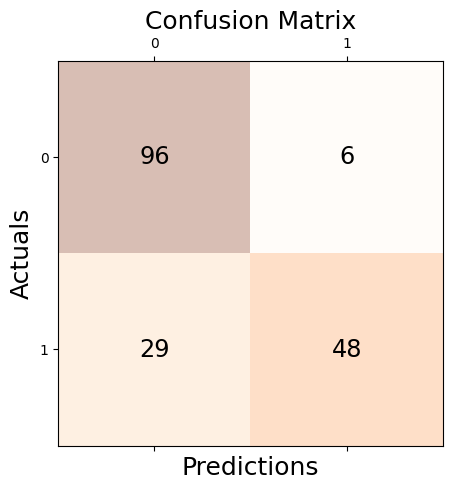

In [64]:
# Calculate the confusion matrix
y_pred_tuned_model = Random_forest_tuned.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_tuned_model)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

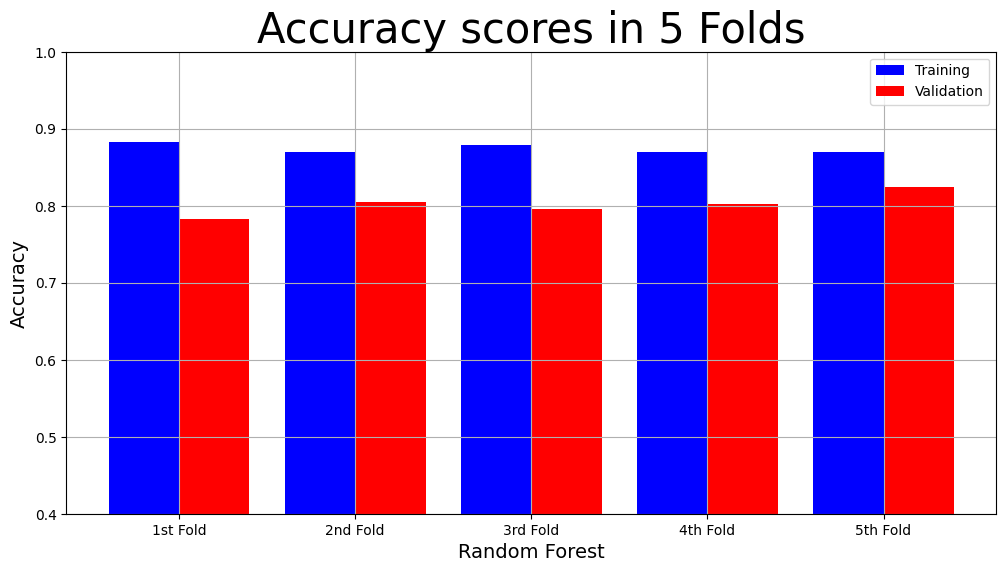

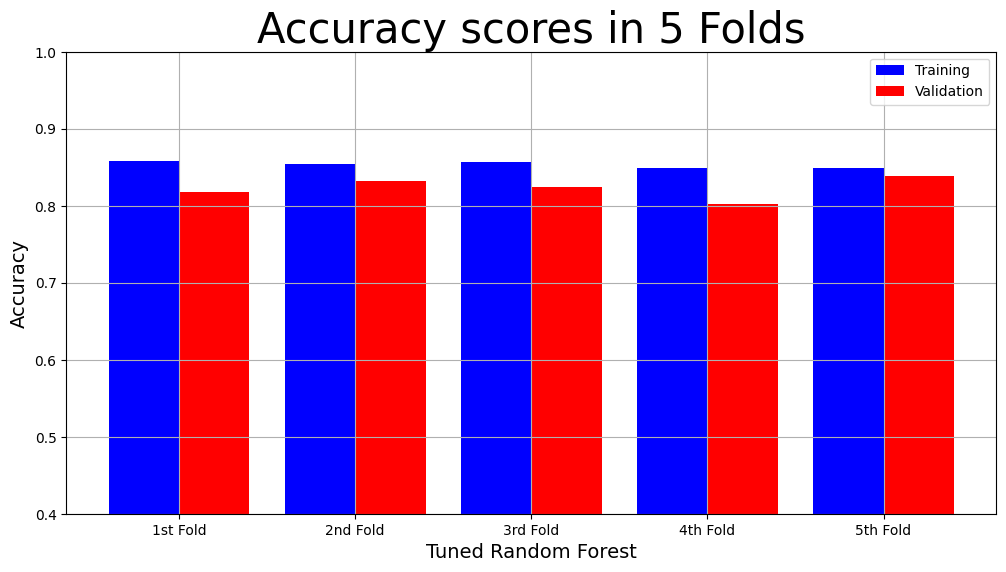

In [65]:
decision_tree_result = cross_validation(random_forest, X_train, y_train, 5)
decision_tree_result_tuned = cross_validation(Random_forest_tuned, X_train, y_train, 5)
model_name = "Random Forest"
model_tuned = "Tuned Random Forest"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

plot_result(model_tuned,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_tuned["Training Accuracy scores"],
            decision_tree_result_tuned["Validation Accuracy scores"])

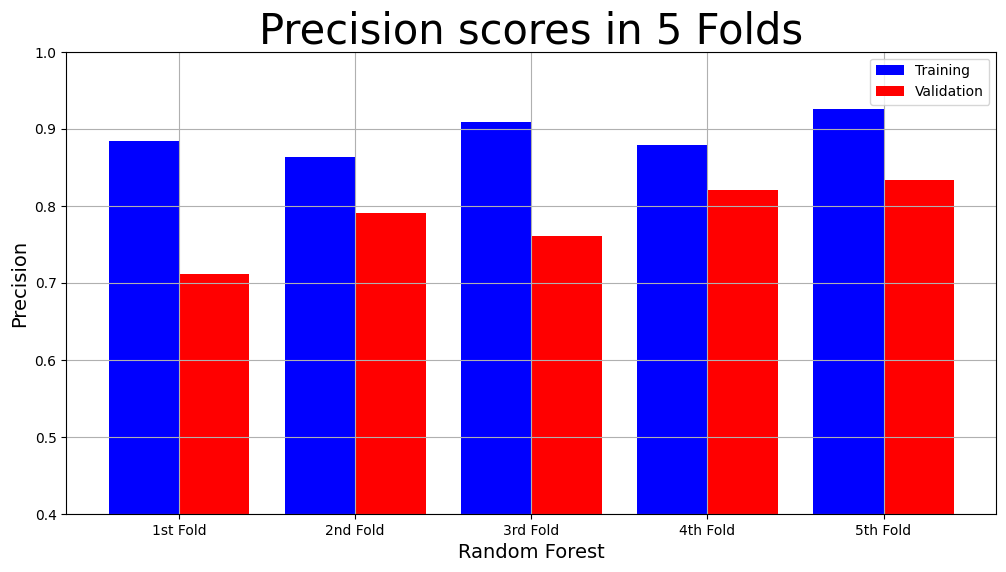

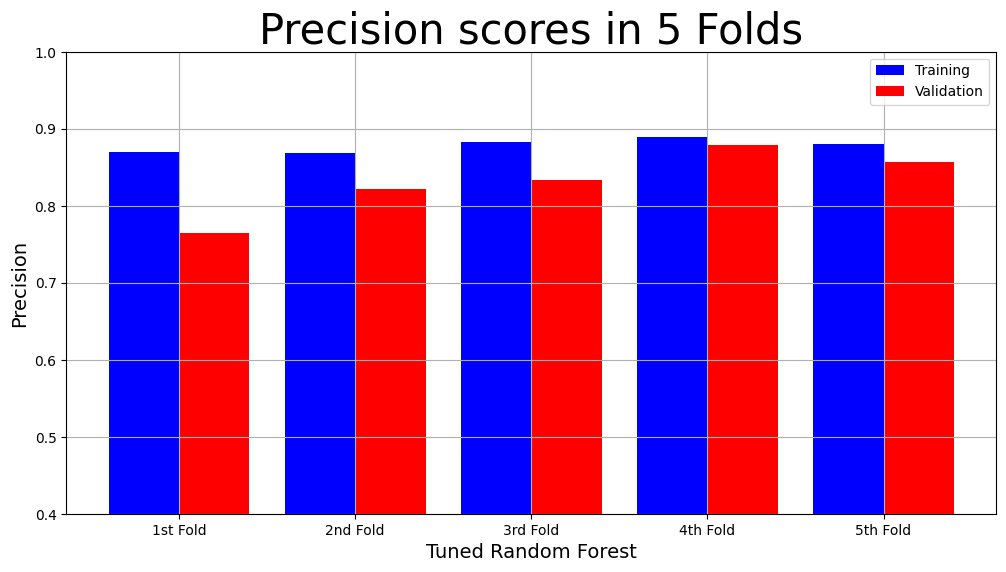

In [66]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

# Plot Precision Result
plot_result(model_tuned,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_tuned["Training Precision scores"],
            decision_tree_result_tuned["Validation Precision scores"])

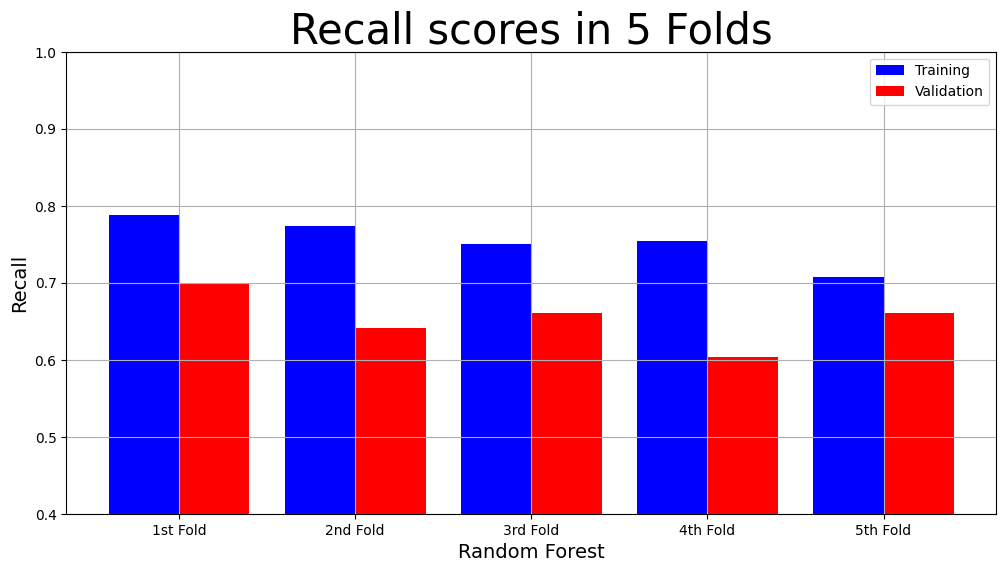

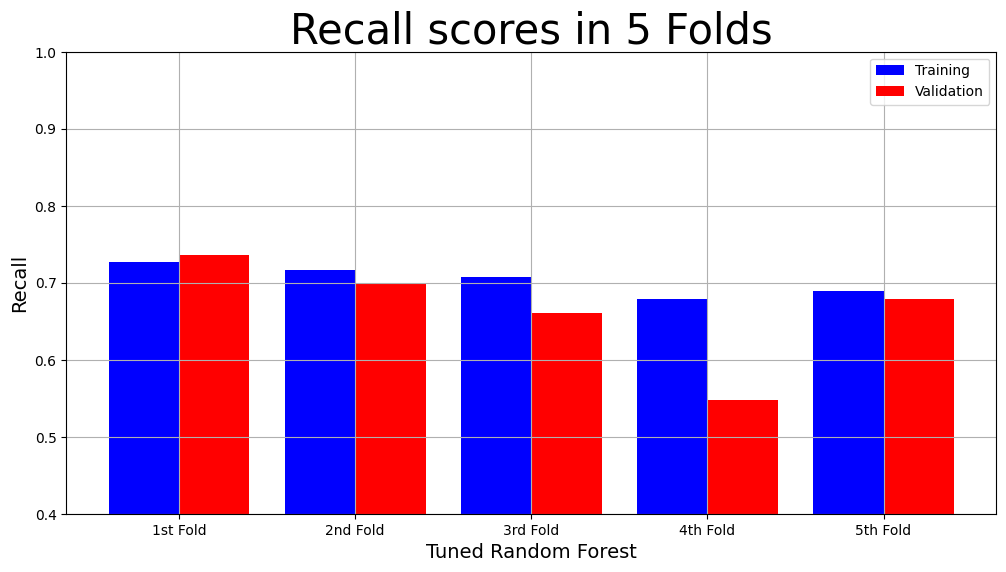

In [67]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])



# Plot Recall Result
plot_result(model_tuned,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result_tuned["Training Recall scores"],
            decision_tree_result_tuned["Validation Recall scores"])

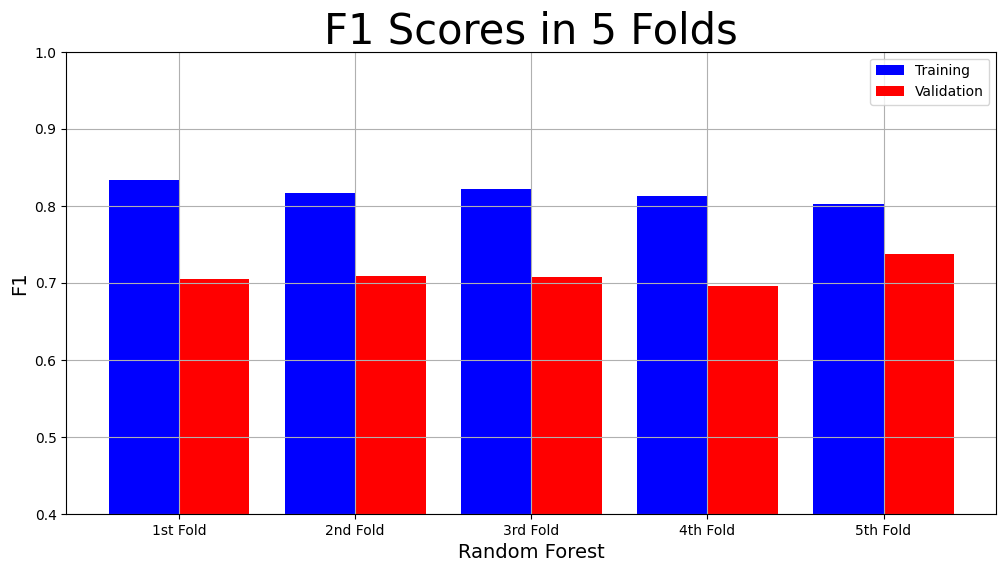

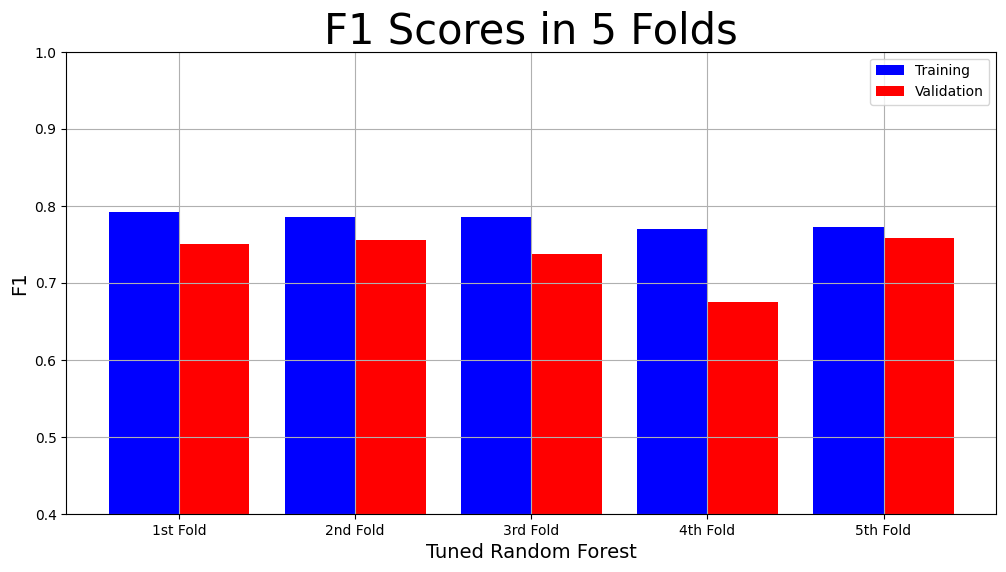

In [68]:

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])


# Plot F1-Score Result
plot_result(model_tuned,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result_tuned["Training F1 scores"],
            decision_tree_result_tuned["Validation F1 scores"])

In [69]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

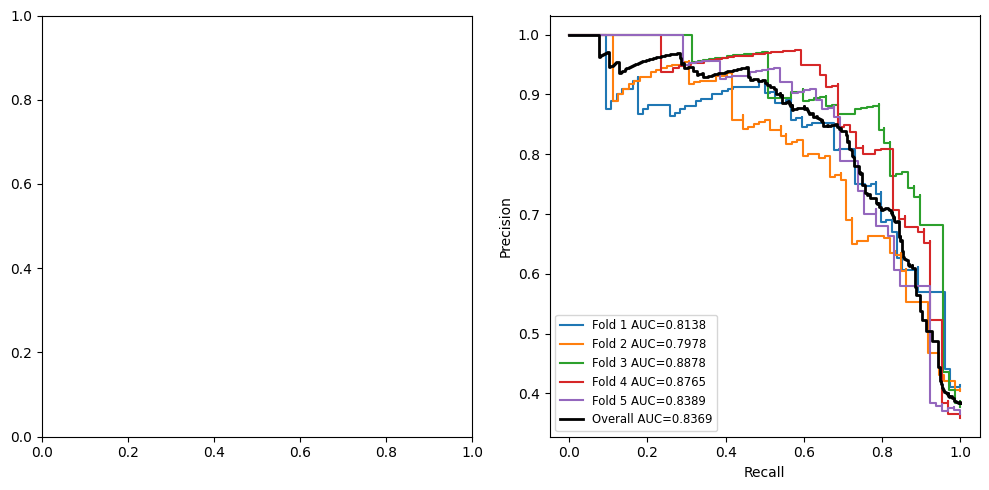

In [70]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold


FOLDS = 5

f, axes = plt.subplots(1, 2, figsize=(10, 5))

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = Random_forest_tuned

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

y_real = numpy.concatenate(y_real)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[1].step(recall, precision, label=lab, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')

f.tight_layout()

In [71]:

# search thresholds for imbalanced classification
from numpy import arange
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
 return (pos_probs >= threshold).astype('int')

In [72]:
# predict probabilities
search_thresold=[]
y_verif_thresold = []


for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    predict_thresold = Random_forest_tuned.predict_proba(Xtest)
    y_verif_thresold.append(ytest)  
    search_thresold.append(predict_thresold[:,1])
# keep probabilities for the positive outcome only


In [73]:
# define thresholds
from numpy import argmax
from sklearn.metrics import f1_score

y_verif_thresold = numpy.concatenate(y_verif_thresold)
search_thresold = numpy.concatenate(search_thresold)

thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_verif_thresold, to_labels(search_thresold, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.472, F-Score=0.76489


In [74]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
lg_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100, scoring='f1', cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
lg_random.fit(X_train, y_train)




Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ................C=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ................C=100, penalty=l2, solv

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   random_state=42, scoring='f1', verbose=2)

In [75]:
lg_random.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}

In [76]:
logistic_tuned = LogisticRegression(solver = 'liblinear', penalty= 'l2' , C=100)

In [77]:
logistic_tuned.fit(X_train,y_train)

LogisticRegression(C=100, solver='liblinear')

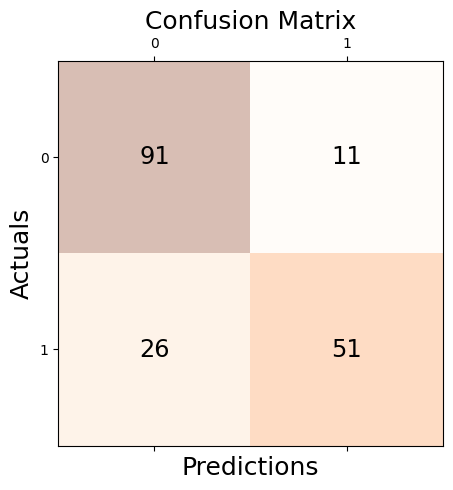

In [78]:
# Calculate the confusion matrix
y_lgpred_tuned_model = logistic_tuned.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_lgpred_tuned_model)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

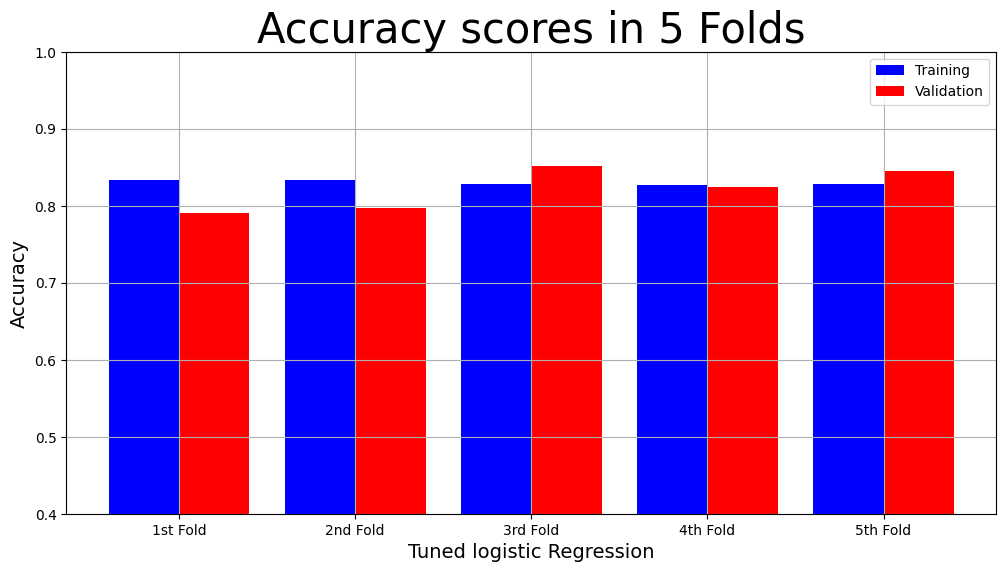

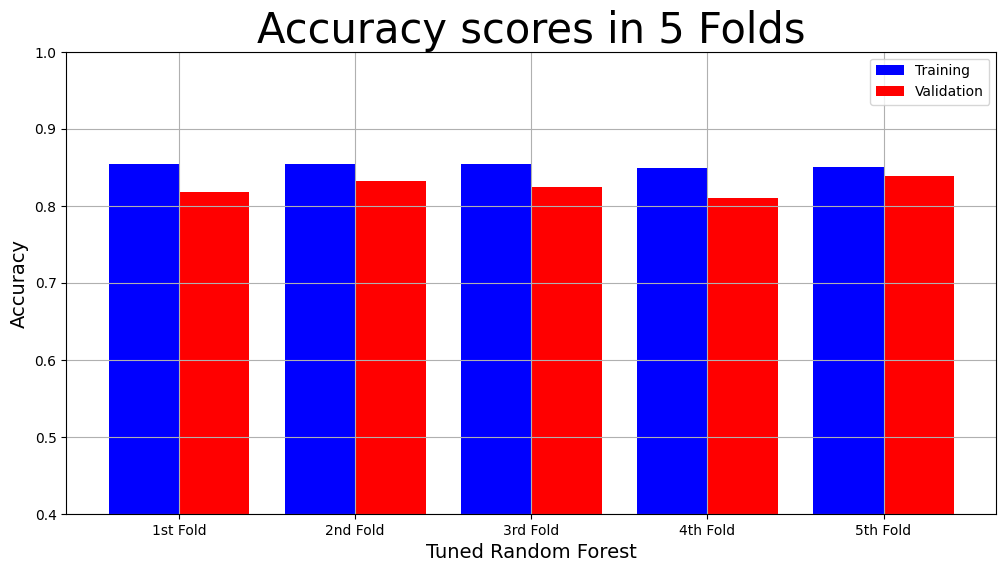

In [79]:
decision_tree_result = cross_validation(logistic_tuned, X_train, y_train, 5)
decision_tree_result_tuned = cross_validation(Random_forest_tuned, X_train, y_train, 5)
model_name = "Tuned logistic Regression"
model_tuned = "Tuned Random Forest"

plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

plot_result(model_tuned,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result_tuned["Training Accuracy scores"],
            decision_tree_result_tuned["Validation Accuracy scores"])

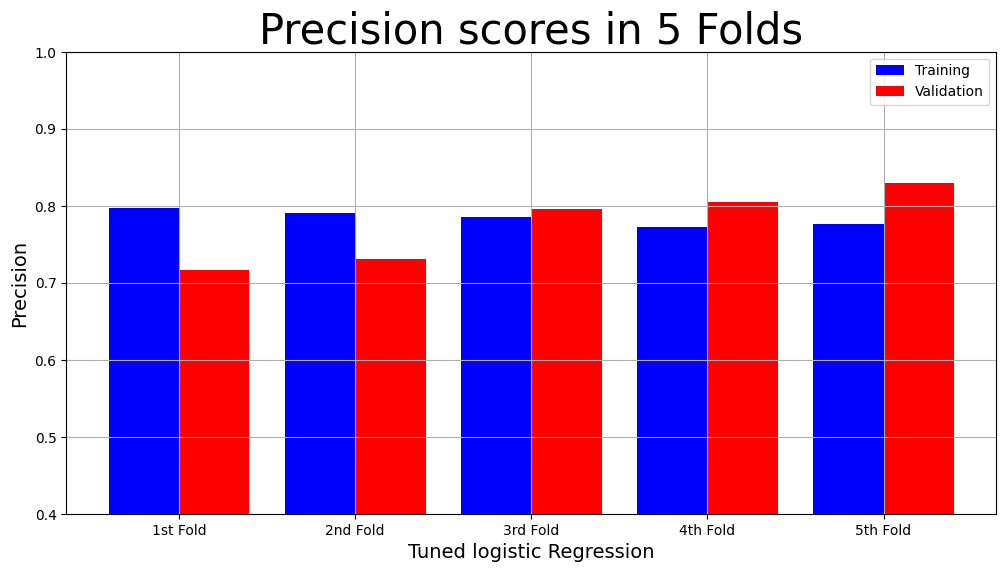

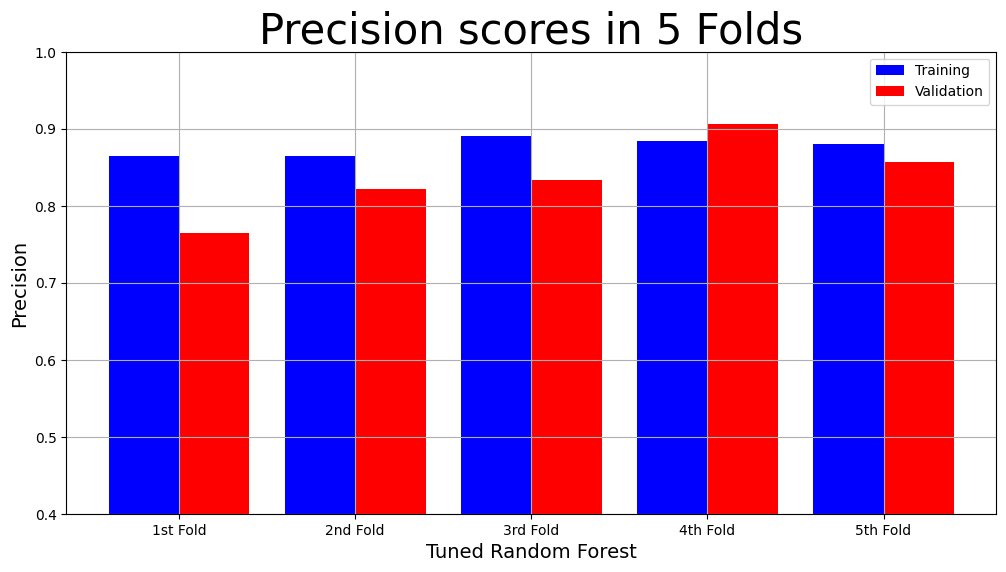

In [80]:
# Plot Precision Result
plot_result(model_name,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

# Plot Precision Result
plot_result(model_tuned,
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result_tuned["Training Precision scores"],
            decision_tree_result_tuned["Validation Precision scores"])

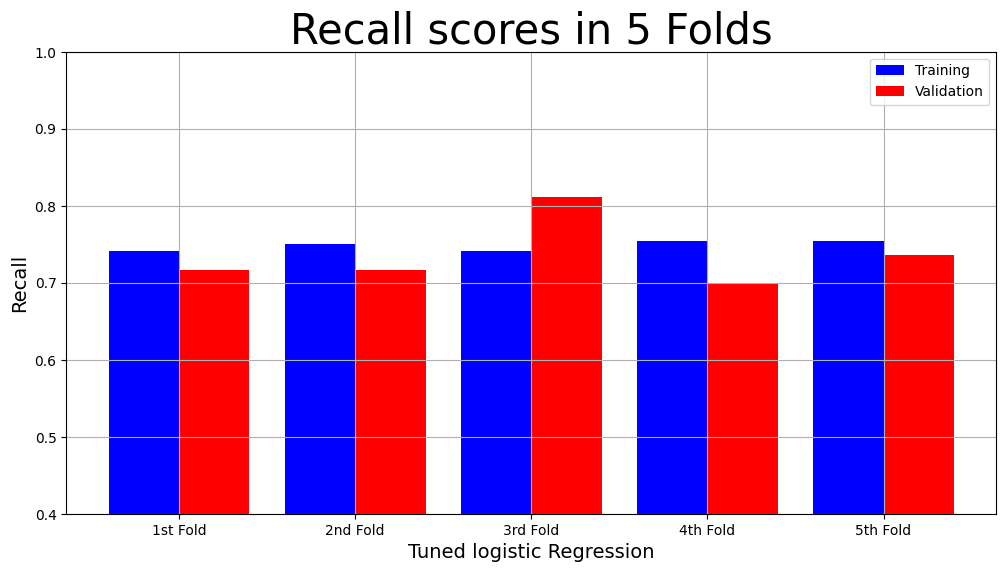

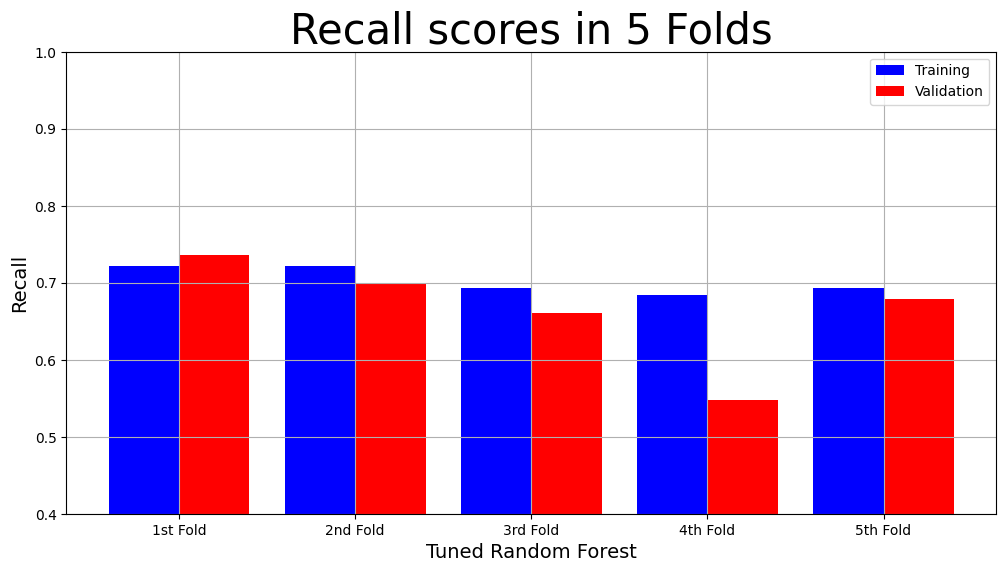

In [81]:
# Plot Recall Result
plot_result(model_name,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])



# Plot Recall Result
plot_result(model_tuned,
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result_tuned["Training Recall scores"],
            decision_tree_result_tuned["Validation Recall scores"])

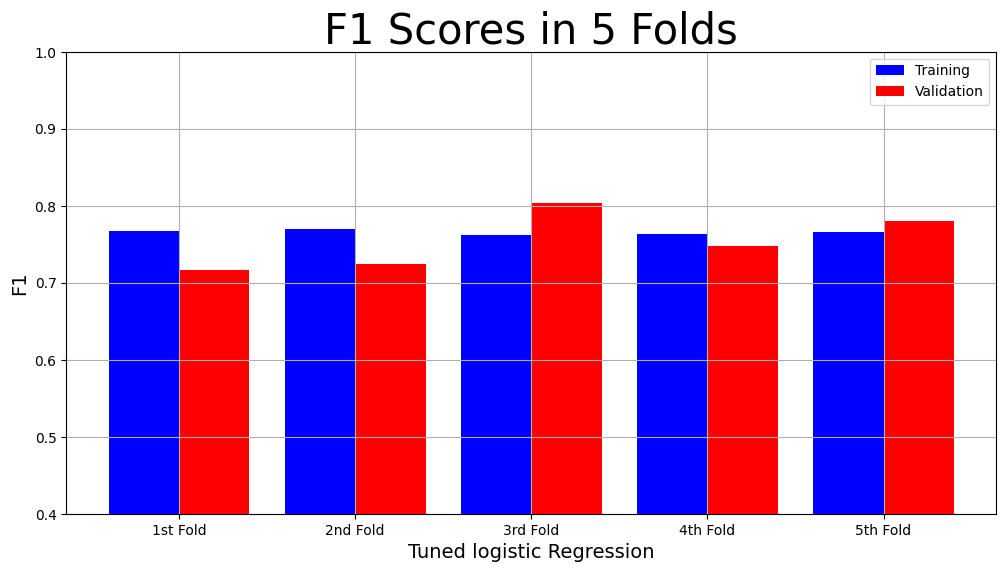

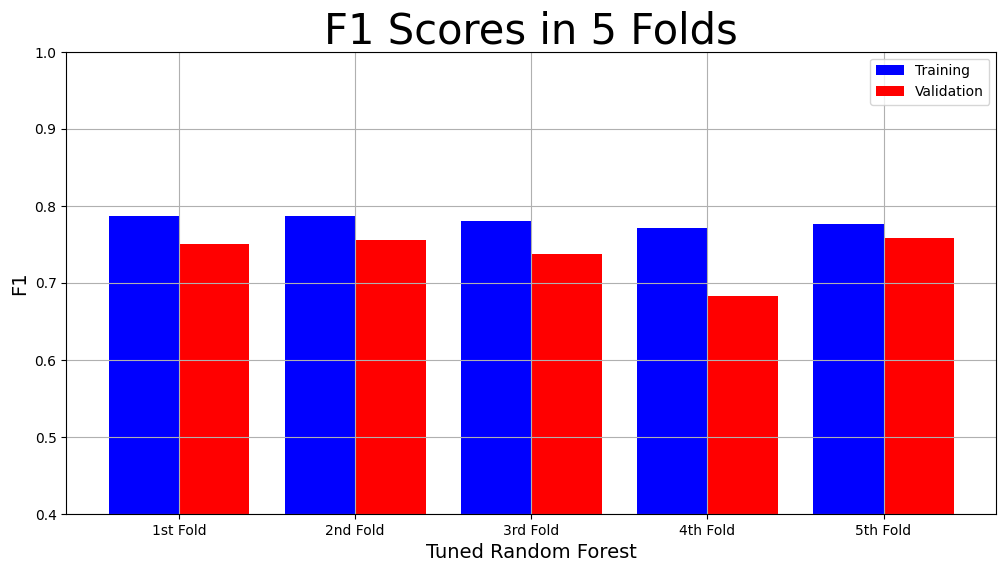

In [82]:

# Plot F1-Score Result
plot_result(model_name,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])


# Plot F1-Score Result
plot_result(model_tuned,
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result_tuned["Training F1 scores"],
            decision_tree_result_tuned["Validation F1 scores"])

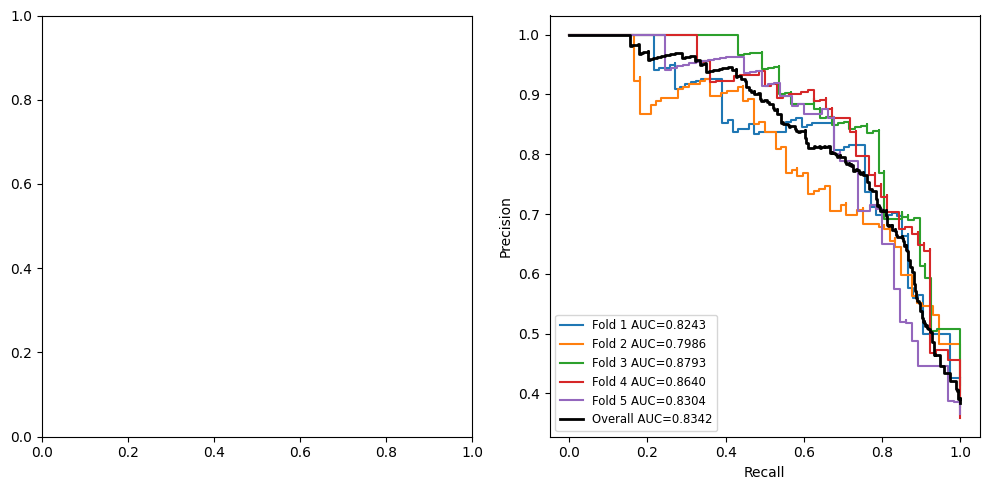

In [83]:
import matplotlib.pyplot as plt
import numpy
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold


FOLDS = 5

f, axes = plt.subplots(1, 2, figsize=(10, 5))

k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
predictor = model

y_real = []
y_proba = []
for i, (train_index, test_index) in enumerate(k_fold.split(X)):
    Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    predictor.fit(Xtrain, ytrain)
    pred_proba = predictor.predict_proba(Xtest)
    precision, recall, _ = precision_recall_curve(ytest, pred_proba[:,1])
    lab = 'Fold %d AUC=%.4f' % (i+1, auc(recall, precision))
    axes[1].step(recall, precision, label=lab)
    y_real.append(ytest)
    y_proba.append(pred_proba[:,1])

y_real = numpy.concatenate(y_real)
y_proba = numpy.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
lab = 'Overall AUC=%.4f' % (auc(recall, precision))
axes[1].step(recall, precision, label=lab, lw=2, color='black')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].legend(loc='lower left', fontsize='small')

f.tight_layout()